<div style="height:300;background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h1>Graphs analisys on: ID_2 and ID_44</h1>
    <h2></h2>
    <hr>
    <h3>By: Gari Ciodaro Guerra</h3>
</div>

In [1]:
import sys

#path_to_class="/home/gari/Desktop/master_tesis_v3/MLDiagnosisTool/Classes/"
#sys.path.append(path_to_class)
import OFHandlers as OFH

In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
test=pd.read_csv("./combined/combined.csv")

In [4]:
test.set_index("subjects",inplace=True)

In [23]:
path_diag="/home/gari/Desktop/master_tesis_v3/NoteBooks/experiment_mass_analysis/"
subjects_12=OFH.load_object(path_diag+"subjects_12.file")

subjects_12.head()

,DX_01,DX_02,DX_03,DX_04,DX_05,DX_06,DX_07,DX_08,DX_09,DX_10,...,START_DATE,Season,Sex,Site,Study,Systolic_BP,Visit_label,Waist_Circumference,Weight,Year
Identifiers,,,,,,,,,,,,,,,,,,,,,
NDARAA075AMK,No Diagnosis Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1901-01-01T07:00:00Z,Summer,F,2.0,HBN,127.0,NaN,21.0,42.8,2016.0
NDARAA117NEJ,ADHD-Combined Type,Oppositional Defiant Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1901-01-01T07:00:00Z,Fall,M,1.0,HBN,107.0,NaN,24.0,61.8,2016.0
NDARAA504CRN,ADHD-Inattentive Type,Specific Learning Disorder with Impairment in ...,Other Specified Anxiety Disorder,Enuresis,Encopresis,NaN,NaN,NaN,NaN,NaN,...,1901-01-01T07:00:00Z,Summer,F,3.0,HBN,118.0,NaN,NaN,73.0,2019.0
NDARAA536PTU,ADHD-Inattentive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1901-01-01T07:00:00Z,Spring,M,2.0,HBN,94.0,NaN,30.0,105.6,2016.0
NDARAA948VFH,ADHD-Combined Type,Enuresis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1901-01-01T07:00:00Z,Summer,F,1.0,HBN,118.0,NaN,22.0,74.0,2017.0


In [5]:
def ajust_prob(x):
    new_x=[]
    for each in x:
        if each>=0.5:
            new_x.append(1)
        else:
            new_x.append(0)
    return new_x
            

ajusted=test.apply(lambda x: ajust_prob(x),result_type="expand")
ajusted.rename(columns={"Predicted_Target_2":"p_2","Predicted_Target_44":"p_44"},inplace=True)
final_gr_df=test.join(ajusted.drop(["target"],axis=1))
final_gr_df

,Predicted_Target_2,Predicted_Target_44,target,p_2,p_44
subjects,,,,,
NDARAA117NEJ,0.728183,0.720940,1,1,1
NDARAY238DFL,0.600490,0.174685,1,1,0
NDARBM839WR5,0.533420,0.850604,1,1,1
NDARBV364MBC,0.243141,0.979891,1,0,1
NDARCB370UK4,0.345616,0.186022,1,0,0
NDARCJ475WJP,0.338050,0.000402,1,0,0
NDARCR499NE4,0.549935,0.458474,1,1,0
NDARCT933HF2,0.493994,0.712361,1,0,1
NDARCW497XW2,0.502900,0.994647,1,1,1


In [139]:
agree_df=final_gr_df.loc[final_gr_df.p_2==final_gr_df.p_44].join(subjects_12[["DX_01"]])
dis_agree_df=final_gr_df.loc[final_gr_df.p_2!=final_gr_df.p_44].join(subjects_12[["DX_01"]])
all_df=final_gr_df.join(subjects_12[["DX_01"]])

In [28]:
len(agree_df)

49

In [164]:
from sklearn.preprocessing import KBinsDiscretizer
import networkx as nx
def create_graph(df,c1_to_encode,c2_to_enconde,n_bins):
    enconder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    df_enconded_1=pd.DataFrame(enconder.fit_transform(df[[c1_to_encode]]),
                                 columns=[c1_to_encode+"_en"],index=df.index)
    df_enconded_2=pd.DataFrame(enconder.transform(df[[c2_to_enconde]]),
                                columns=[c2_to_enconde+"_en"],index=df.index)
    df_in=df.join(df_enconded_1).join(df_enconded_2)
    
    G = nx.Graph()
    colors=[]
    #add nodes
    for each in df_in.index:
        row=df_in.loc[each]
        if row.target == 0:
            G.add_node(each+"p_22")
            colors.append("blue")
            G.add_node(each+"p_44")
            colors.append("blue")
        else:
            G.add_node(each+"p_22")
            colors.append("red")
            G.add_node(each+"p_44")
            colors.append("red")
    #add links
    d_total=[]
    for each in df_in.index:
        row=df_in.loc[each]
        d=abs(row[c1_to_encode+"_en"]-row[c2_to_enconde+"_en"])+0.1
        #if d>1.3558:
        #    d=5
        #d=abs(row[c1_to_encode+"_en"]-row[c2_to_enconde+"_en"])
        d_total.append(d)
        G.add_edge(each+"p_22",each+"p_44",weight=d)
    return G,colors,d_total


In [165]:
g_agree,colors,d_agree=create_graph(agree_df,"Predicted_Target_2","Predicted_Target_44",10)
g_dis_agree,colors_dis_agree,d_dis=create_graph(dis_agree_df,"Predicted_Target_2","Predicted_Target_44",10)
all_sub,colors_all,d_all=create_graph(all_df,"Predicted_Target_2","Predicted_Target_44",10)

In [166]:
np.mean(d_all)

3.3558139534883744

In [167]:
np.std(d_all)

1.95998366457139

In [169]:
np.var(d_all)

3.8415359653866945

In [141]:
#agree_df.groupby("DX_01").count().plot(kind='pie',y='target')
#d_agree
#d_agree

In [67]:
dis_agree_df.groupby("DX_01").count()

,Predicted_Target_2,Predicted_Target_44,target,p_2,p_44
DX_01,,,,,
ADHD-Combined Type,23,23,23,23,23
ADHD-Inattentive Type,6,6,6,6,6
No Diagnosis Given,8,8,8,8,8


In [46]:
np.mean(d_agree)

2.306122448979592

In [47]:
np.std(d_agree)

1.4456702651775377

In [48]:
np.mean(d_dis)

4.378378378378378

In [49]:
np.std(d_dis)

1.8358494808369399

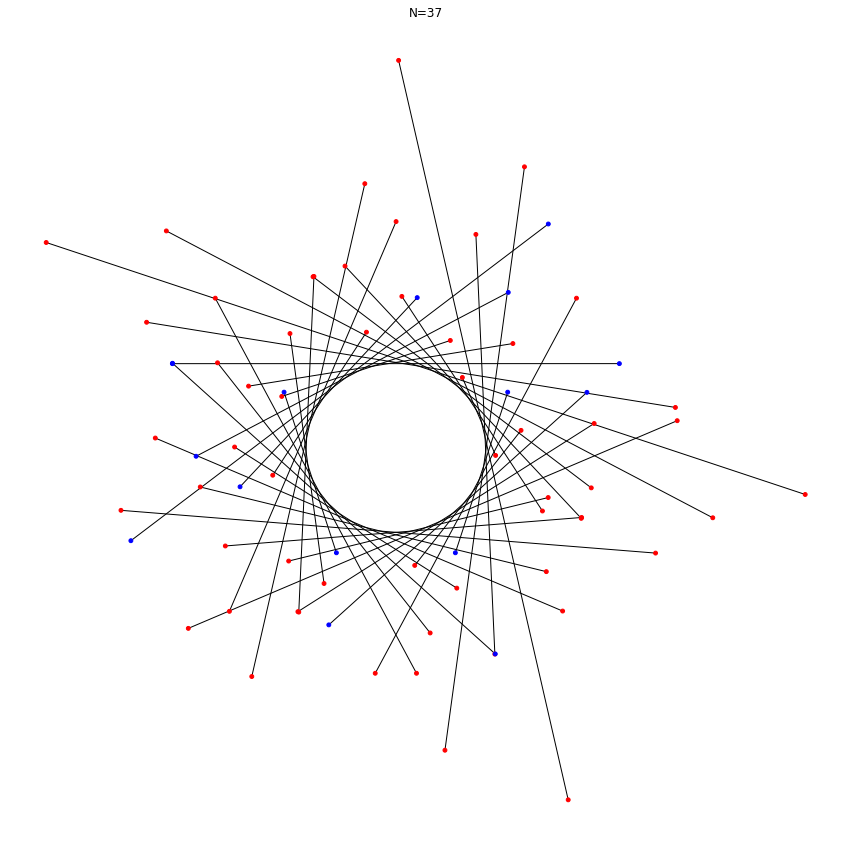

In [75]:
fig=plt.figure(figsize=(15,15))
#ax=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,1,1)
#pos_agree = nx.kamada_kawai_layout(g_agree)
#nx.draw(g_agree, pos_agree, node_size=15,ax=ax,node_color = colors,with_labels=False)
#ax.set_title("N="+str(len(agree_df)))

pos_agree_dis = nx.kamada_kawai_layout(g_dis_agree)
nx.draw(g_dis_agree, pos_agree_dis, node_size=15,ax=ax2,node_color = colors_dis_agree,with_labels=False)
ax2.set_title("N="+str(len(dis_agree_df)))

#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)

#plt.savefig('disimilarity.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")
plt.show() 

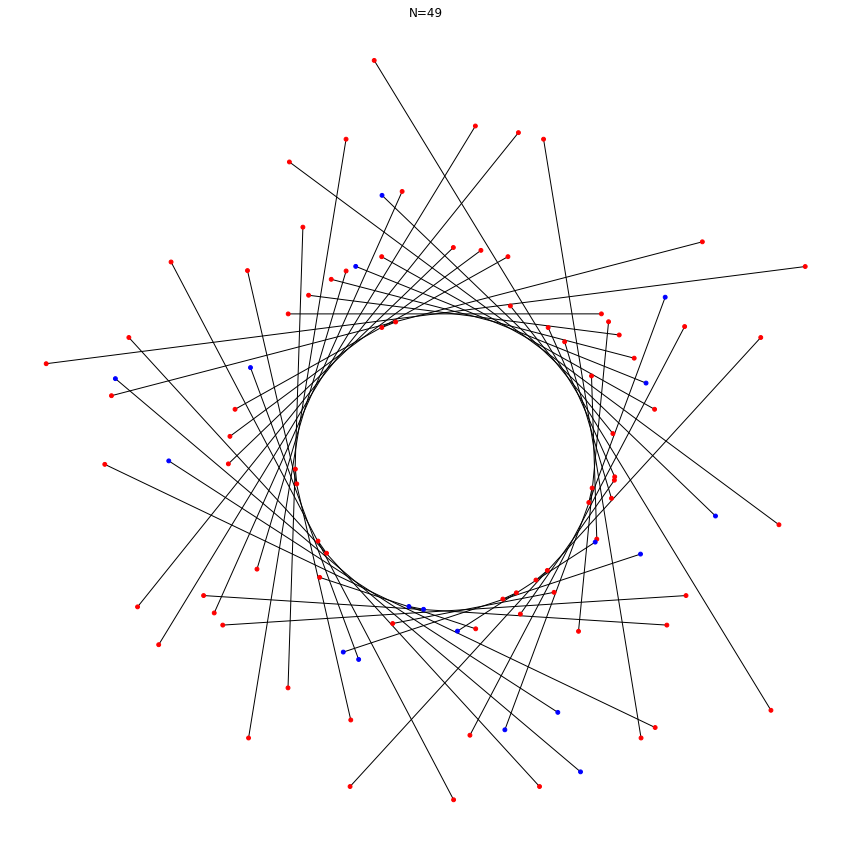

In [131]:
fig=plt.figure(figsize=(15,15))
#ax=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,1,1)
#pos_agree = nx.kamada_kawai_layout(g_agree)
#nx.draw(g_agree, pos_agree, node_size=15,ax=ax,node_color = colors,with_labels=False)
#ax.set_title("N="+str(len(agree_df)))
#g_agree,colors,d_agree,edge_labels_agree

pos_agree_dis = nx.kamada_kawai_layout(g_agree)
nx.draw(g_agree, pos_agree_dis, node_size=15,ax=ax2,node_color=colors,with_labels=False)
ax2.set_title("N="+str(len(agree_df)))

#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)

#plt.savefig('disimilarity.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")
plt.show() 

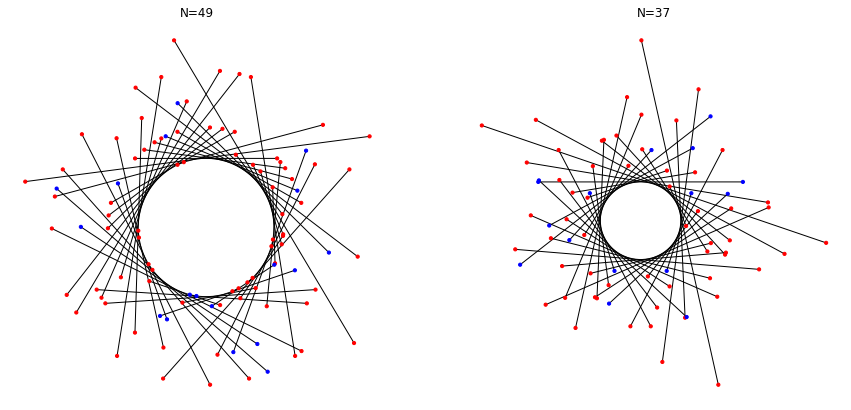

In [138]:
fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
#pos_agree = nx.kamada_kawai_layout(g_agree)
#nx.draw(g_agree, pos_agree, node_size=15,ax=ax,node_color = colors,with_labels=False)
#ax.set_title("N="+str(len(agree_df)))
#g_agree,colors,d_agree,edge_labels_agree


nx.draw(g_agree, nx.kamada_kawai_layout(g_agree), node_size=10,ax=ax,node_color=colors,with_labels=False)
ax.set_title("N="+str(len(agree_df)))

nx.draw(g_dis_agree, nx.kamada_kawai_layout(g_dis_agree),
        node_size=10,ax=ax2,node_color=colors_dis_agree,with_labels=False)
ax2.set_title("N="+str(len(dis_agree_df)))

#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)

plt.savefig('netwoek.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")
plt.show() 

In [108]:
all_sub,colors_all,d_all

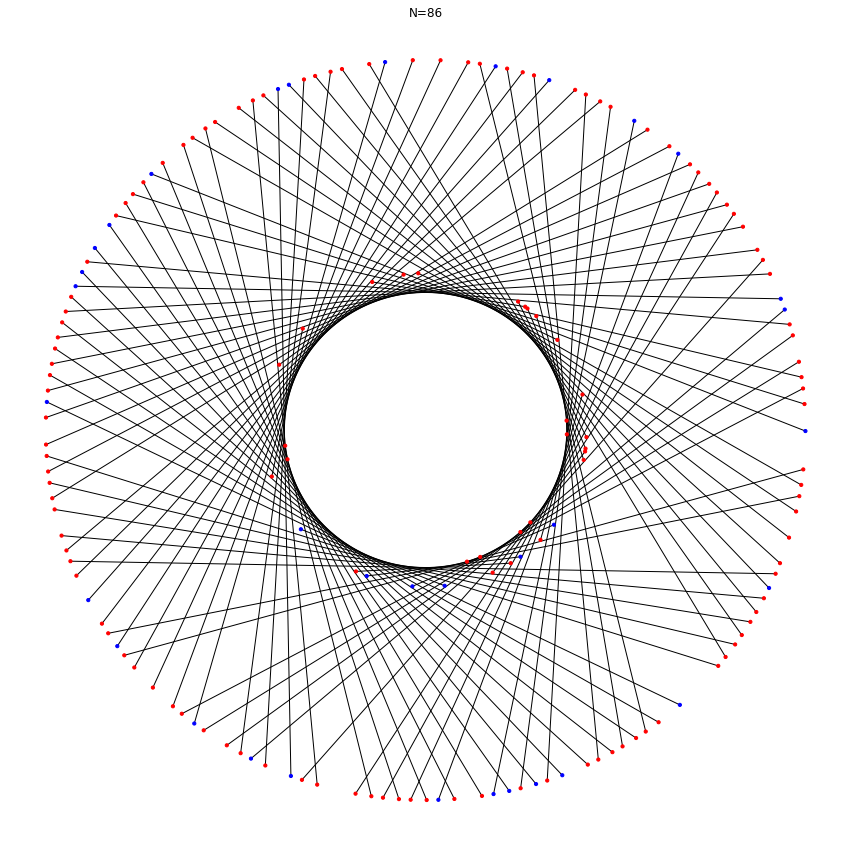

In [163]:
fig=plt.figure(figsize=(15,15))
#ax=fig.add_subplot(1,1,1)
ax=fig.add_subplot(1,1,1)
#pos_agree = nx.kamada_kawai_layout(g_agree)
#nx.draw(g_agree, pos_agree, node_size=15,ax=ax,node_color = colors,with_labels=False)
#ax.set_title("N="+str(len(agree_df)))
#g_agree,colors,d_agree,edge_labels_agree

nx.draw(all_sub, nx.kamada_kawai_layout(all_sub), node_size=10,ax=ax,node_color=colors_all,with_labels=False)
ax.set_title("N="+str(len(all_df)))
#labels = nx.get_edge_attributes(all_sub,'weight')
#nx.draw_networkx_edge_labels(all_sub,nx.kamada_kawai_layout(all_sub),edge_labels=labels)
#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)

#plt.savefig('all_subject.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")
plt.show()

In [147]:
np.mean(d_all)

3.3558139534883744

In [104]:

final_gr_df.loc["NDARKW010CT2"]

Predicted_Target_2     0.723804
Predicted_Target_44    0.683576
target                 1.000000
p_2                    1.000000
p_44                   1.000000
Name: NDARKW010CT2, dtype: float64

In [105]:
final_gr_df.loc["NDARCW497XW2"]

Predicted_Target_2     0.502900
Predicted_Target_44    0.994647
target                 1.000000
p_2                    1.000000
p_44                   1.000000
Name: NDARCW497XW2, dtype: float64

In [144]:
len(colors)

98

In [140]:
fdf=16/2

In [141]:
fdf

8.0

In [143]:
18/2

9.0

In [146]:
98-18

80

In [151]:
16-(37)

-21

In [186]:
# agree 40 hdhd, 9 healthy
#dis agree: 21 hdhd ,8 healthy
dis_agree_df.describe()
dis_agree_df["diff"]=abs(dis_agree_df.Predicted_Target_2-dis_agree_df.Predicted_Target_44)
dis_agree_df.describe()

/home/gari/anaconda3/envs/EEG/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Predicted_Target_2,Predicted_Target_44,target,p_2,p_44,diff
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.521934,0.478394,0.783784,0.513514,0.486486,0.358763
std,0.126011,0.305608,0.417342,0.506712,0.506712,0.181530
min,0.243141,0.001158,0.000000,0.000000,0.000000,0.091461
25%,0.435696,0.210746,1.000000,0.000000,0.000000,0.218367
50%,0.517442,0.458474,1.000000,1.000000,0.000000,0.326026
75%,0.585299,0.712361,1.000000,1.000000,1.000000,0.464312
max,0.917164,0.983883,1.000000,1.000000,1.000000,0.751274


In [187]:

agree_df["diff"]=abs(agree_df.Predicted_Target_2-agree_df.Predicted_Target_44)
agree_df.describe()

/home/gari/anaconda3/envs/EEG/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Predicted_Target_2,Predicted_Target_44,target,p_2,p_44,diff
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.520333,0.585280,0.816327,0.653061,0.653061,0.227657
std,0.121935,0.337134,0.391230,0.480929,0.480929,0.140364
min,0.249418,0.000402,0.000000,0.000000,0.000000,0.004194
25%,0.439744,0.239312,1.000000,0.000000,0.000000,0.132476
50%,0.527769,0.688531,1.000000,1.000000,1.000000,0.195004
75%,0.593274,0.850604,1.000000,1.000000,1.000000,0.359596
max,0.779538,0.998940,1.000000,1.000000,1.000000,0.491747


In [174]:
from sklearn.metrics import precision_score,f1_score

f1_new_2=f1_score(agree_df.target,agree_df.p_2)
old_f1_2=0.733
gain_f1_2=f1_new_2-old_f1_2
gain_f1_2*100

10.033333333333339

In [175]:
precision_score_2=precision_score(agree_df.target,agree_df.p_2)
old_precision_score_2=0.866
gain_precision_2=precision_score_2-old_precision_score_2
gain_precision_2*100

7.15

In [176]:
f1_new_44=f1_score(agree_df.target,agree_df.p_44)
old_f1_44=0.76
gain_f1_44=f1_new_44-old_f1_44
gain_f1_44*100


7.333333333333336

In [177]:
precision_score_44=precision_score(agree_df.target,agree_df.p_44)
old_precision_score_44=0.9

gain_precision_44=precision_score_44-old_precision_score_44
gain_precision_44*100

3.749999999999998